## Importing Libraries

In [ ]:
!pip install --upgrade pip
!pip install tensorflow  # Ensure TensorFlow is installed


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
from google.colab import files
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# # Ensure TensorFlow version is 2.x
# assert tf.__version__.startswith('2')


## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_file_name = "/content/drive/MyDrive/datasets/dataset" #@param {type:"string"}
!unzip {zip_file_name}.zip

Archive:  /content/drive/MyDrive/datasets/dataset.zip
   creating: dataset/
   creating: dataset/apple/
  inflating: dataset/apple/Image_1.jpg  
  inflating: dataset/apple/Image_10.jpg  
  inflating: dataset/apple/Image_16.jpg  
  inflating: dataset/apple/Image_17.jpg  
  inflating: dataset/apple/Image_18.jpg  
  inflating: dataset/apple/Image_19.jpg  
  inflating: dataset/apple/Image_2.jpg  
  inflating: dataset/apple/Image_20.jpg  
  inflating: dataset/apple/Image_21.jpg  
  inflating: dataset/apple/Image_23.jpg  
  inflating: dataset/apple/Image_24.jpg  
  inflating: dataset/apple/Image_25.jpg  
  inflating: dataset/apple/Image_26.jpg  
  inflating: dataset/apple/Image_27.jpg  
  inflating: dataset/apple/Image_28.jpg  
  inflating: dataset/apple/Image_3.jpg  
  inflating: dataset/apple/Image_31.jpg  
  inflating: dataset/apple/Image_32.jpg  
  inflating: dataset/apple/Image_33.jpg  
  inflating: dataset/apple/Image_34.jpg  
  inflating: dataset/apple/Image_35.png  
  inflating: data

In [ ]:
image_path = '/content/dataset'

In [ ]:
print(image_path)
labels = []
for i in os.listdir(image_path):
  if os.path.isdir(os.path.join(image_path, i)):
    labels.append(i)
print(labels)

/content/dataset
['potato', 'lemon', 'watermelon', 'apple', 'onion', 'banana']


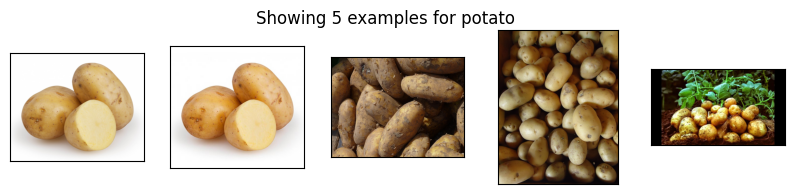

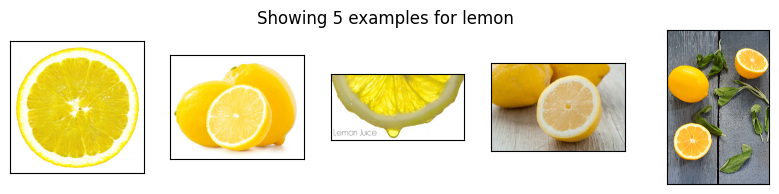

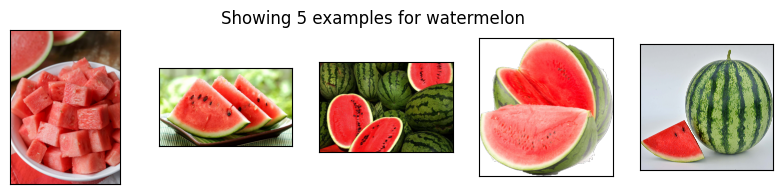

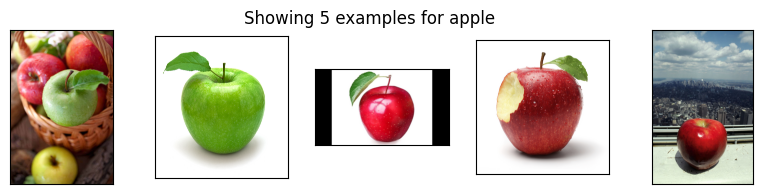

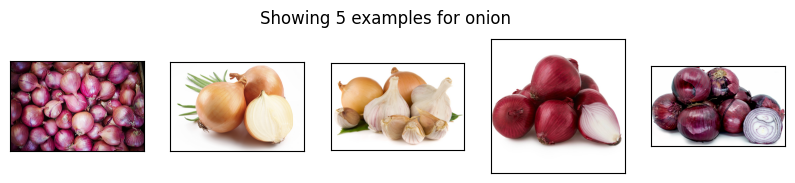

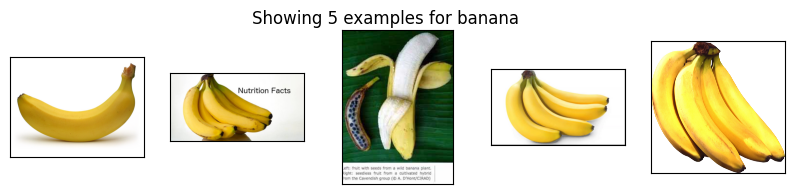

In [ ]:
NUM_EXAMPLES = 5

for label in labels:
  label_dir = os.path.join(image_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data = datagen.flow_from_directory(
    image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 436 images belonging to 6 classes.
Found 46 images belonging to 6 classes.


## Model Training

In [ ]:
base = tf.keras.applications.MobileNetV2(
    input_shape=(150,150,3),
    include_top=False,
    weights="imagenet"
)
base.trainable = False

model = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])


/tmp/ipython-input-1077198128.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_data, validation_data=validation_data, epochs=50)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.2904 - loss: 1.9067 - val_accuracy: 0.8913 - val_loss: 0.5456
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8077 - loss: 0.5932 - val_accuracy: 0.9348 - val_loss: 0.2412
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9525 - loss: 0.2612 - val_accuracy: 0.9565 - val_loss: 0.1732
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9718 - loss: 0.1797 - val_accuracy: 0.9565 - val_loss: 0.1407
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9771 - loss: 0.1466 - val_accuracy: 0.9565 - val_loss: 0.1346
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9784 - loss: 0.1156 - val_accuracy: 0.9783 - val_loss: 0.1110
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9835 - loss: 0.0975 - val_accuracy: 0.9565 - val_loss: 0.1152
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9870 - loss: 0.0756 - val_accuracy: 0.9565 - val_loss:

##Model Evaluation

In [ ]:
loss, acc = model.evaluate(validation_data)
print(f'Test loss: {loss}, Test accuracy: {acc}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.9751 - loss: 0.0653
Test loss: 0.06595583260059357, Test accuracy: 0.97826087474823


##Model Conversion

In [ ]:
model.save('/content/model/exported_model.h5')

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_path = "/content/FruitsClassifier.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print("Saved TFLite model to:", tflite_model_path)


Saved artifact at '/tmp/tmpahsbr9vx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  136702375363024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375363792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375366480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375366096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375364944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375366672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375365136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375367248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375366864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136702375364752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1367023753

### Retraining parameters

> Indented block



You can further customize how the retraining process runs to adjust training time and potentially increase the retrained model's performance. *These parameters are optional*. Use the `ImageClassifierModelOptions` class and the `HParams` class to set these additional options.

Use the `ImageClassifierModelOptions` class parameters to customize the existing model. It has the following customizable parameter that affects model accuracy:
* `dropout_rate`: The fraction of the input units to drop. Used in dropout layer. Defaults to 0.05.

Use the `HParams` class to customize other parameters related to training and saving the model:

* `learning_rate`: The learning rate to use for gradient descent training. Defaults to 0.001.
* `batch_size`: Batch size for training. Defaults to 2.
* `epochs`: Number of training iterations over the dataset. Defaults to 10.
* `steps_per_epoch`: An optional integer that indicates the number of training steps per epoch. If not set, the training pipeline calculates the default steps per epoch as the training dataset size divided by batch size.
* `shuffle`: True if the dataset is shuffled before training. Defaults to False.
* `do_fine_tuning`: If true, the base module is trained together with the classification layer on top. This defaults to False, which means only the classification layer is trained and pre-trained weights for the base module are frozen.
* `l1_regularizer`: A regularizer that applies a L1 regularization penalty. Defaults to 0.0.
* `l2_regularizer`: A regularizer that applies a L2 regularization penalty. Defaults to 0.0001.
* `label_smoothing`: Amount of label smoothing to apply. See [`tf.keras.losses`](https://www.tensorflow.org/api_docs/python/tf/keras/losses) for more details. Defaults to 0.1.
* `do_data_augmentation`: Whether or not the training dataset is augmented by applying random transformations such as cropping, flipping, etc. See [utils.image_preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image) for details. Defaults to True.
* `decay_samples`: Number of training samples used to calculate the decay steps and create the training optimizer. Defaults to 2,560,000.
* `warmup_epochs`: Number of warmup steps for a linear increasing warmup schedule on the learning rate. Used to set up warmup schedule by `model_util.WarmUp`. Defaults to 2.



In [ ]:
hparams=image_classifier.HParams(epochs=15, export_dir="exported_model_2")
options = image_classifier.ImageClassifierOptions(supported_model=spec, hparams=hparams)
model_2 = image_classifier.ImageClassifier.create(
    train_data = train_data,
    validation_data = validation_data,
    options=options,
)

In [ ]:
loss, accuracy = model_2.evaluate(test_data)

In [ ]:
model.export_model()